In [3]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns
from datetime import datetime

In [4]:
#loading scraped data file

df = pd.read_csv('running_shoes.csv')


In [5]:
# transforming column fields into numeric data types

df['retail_price'] = df.retail_price.dropna().map(lambda s : re.findall(('\d+'), s)).map(lambda l : int(l[0]))
df['sale_price'] = df.sale_price.dropna().map(lambda s: re.findall(('\d+'), s)).map(lambda l : int(l[0]))
df['weight_men']= df.weight_men.dropna().map(lambda s: re.findall(('\d*\.?\d'), s)).map(lambda l : float(l[0]))
df['weight_women']=df.weight_women.dropna().map(lambda s: re.findall(('\d*\.?\d'), s)).map(lambda l : float(l[0]))
df['heel_to_toe_men'] = df.heel_to_toe_men.dropna().map(lambda s: re.findall(('\d*\.?\d'), s)).map(lambda l : float(l[0])) 
df['heel_to_toe_women'] = df.heel_to_toe_women.dropna().map(lambda s: re.findall(('\d*\.?\d'), s)).map(lambda l : float(l[0])) 

In [662]:
df.groupby('brand').agg('mean')

,core_score,expert_score,reviews,retail_price,sale_price,weight_men,weight_women,heel_to_toe_men,heel_to_toe_women
brand,,,,,,,,,
361 Degrees,85.555556,87.750000,15.333333,113.500000,52.000000,10.010000,8.380000,8.333333,8.333333
Adidas,87.829146,84.312500,697.557789,127.736041,75.197080,10.248980,9.163946,9.163265,9.142857
Altra,88.571429,86.816327,262.755102,128.529412,81.290323,9.279592,7.757143,0.000000,0.000000
Arc'teryx,85.000000,89.500000,8.000000,180.000000,NaN,9.133333,7.700000,8.333333,8.333333
Asics,87.070248,84.291045,1140.764463,118.391837,72.544944,10.395111,8.651111,9.300000,9.660870
Brooks,88.944954,85.755556,685.761468,129.862385,98.640000,10.442056,9.057009,8.897196,8.897196
Columbia,83.000000,91.000000,18.000000,125.000000,75.000000,10.800000,6.100000,8.000000,5.000000
Dynafit,82.000000,80.800000,8.500000,155.000000,109.500000,10.375000,9.262500,7.428571,7.428571
Hoka One One,88.260274,86.285714,445.616438,147.397260,104.114286,9.936111,8.419444,4.416667,4.416667


In [537]:
df.sample(2)

,product,brand,core_score,expert_score,reviews,retail_price,sale_price,terrain,arch_support,weight_men,weight_women,heel_to_toe_men,heel_to_toe_women,release_date,width,update,url,summary
1446,Inov-8 Roclite 282 GTX,Inov-8,92.0,87.0,45.0,160.0,NaN,Trail,Neutral,9.9,8.7,9.0,9.0,NaT,Normal | Normal,NaN,https://runrepeat.com/inov-8-roclite-282-gtx,5 reasons to buy\nThe synthetic materials and ...
1709,Scott Kinabalu RC,Scott,81.0,86.0,6.0,140.0,NaN,Trail,Neutral,9.5,8.8,5.0,5.0,NaT,Normal | Normal,Scott Kinabalu RC 2.0,https://runrepeat.com/scott-kinabalu-rc,7 reasons to buy\nSome runners mentioned that ...


In [6]:
#splitting terrain into Road and Trail
def terrain(s):
    if 'Road' in s:
        return 'Road'
    else:
        return 'Trail'
df['terrain'] =  df.terrain.dropna().map(terrain)

In [7]:
# converting release date to time-value
def date_conversion(s):
    s = s.strip()
    return datetime.strptime(s, '%b %Y')
#datetime.datetime(2019, 2, 2, 0, 0)
df['release_date'] = df.release_date.dropna().map(date_conversion)

In [13]:
release_date_2019 = df[df['release_date'] >= '2019-01-01']
release_date_2017 = df[(df['release_date'] < '2019-01-01') & (df['release_date'] >= '2017-01-01')]
release_date_2015 =  df[(df['release_date'] < '2017-01-01') & (df['release_date'] >= '2015-01-01')]
top_rated = df[df['core_score']>=91]

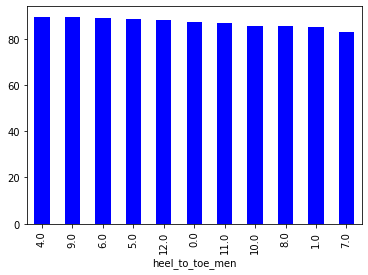

In [14]:
release_date_2019.groupby('heel_to_toe_men')['expert_score'].mean().sort_values(ascending=False).plot.bar(color='b')

Text(0.5, 1.0, 'Do consumers prefer a type of Arch Support?')

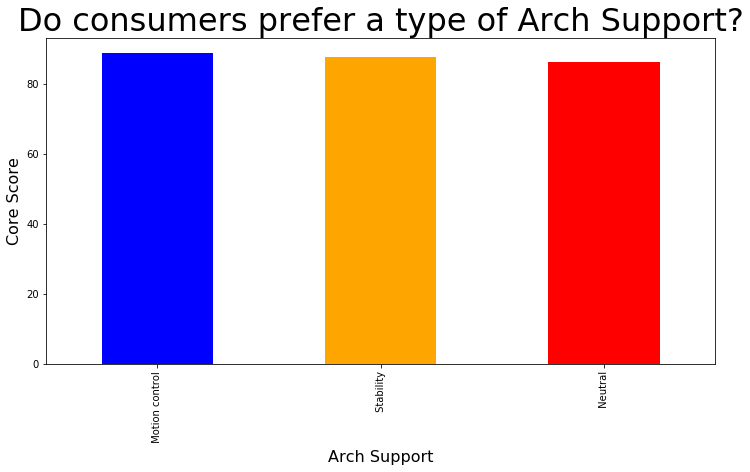

In [708]:
plt.figure(figsize=(12,6))
df.groupby('arch_support')['core_score'].mean().sort_values(ascending=False).plot.bar(color=['b','orange','r'])
plt.xlabel('Arch Support', fontsize=16)
plt.ylabel('Core Score', fontsize=16)
plt.title('Do consumers prefer a type of Arch Support?', fontsize = 32)

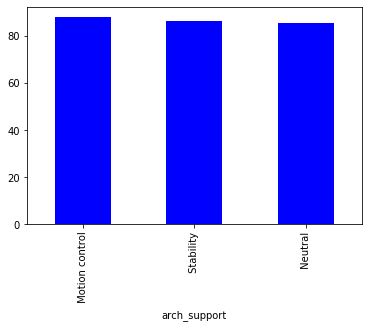

In [477]:
release_date_2017.groupby('arch_support')['expert_score'].mean().sort_values(ascending=False).plot.bar(color='b')

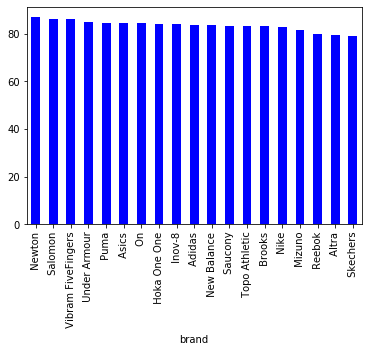

In [15]:
release_date_2015.groupby('brand')['expert_score'].mean().sort_values(ascending=False).plot.bar(color='b')

In [499]:
large_brands = df[(df.groupby('brand').count()>10)] #['core_score'].mean().sort_values(ascending=False).plot.bar(color='b')

In [501]:
large_brands.groupby('brand')['core_score'].mean().sort_values(ascending=False).plot.bar(color='b')

AttributeError: 'float' object has no attribute 'sort_values'

In [452]:
high_price = df[df['retail_price'] >=160]
high_price.head(2)

,product,brand,core_score,expert_score,reviews,retail_price,sale_price,terrain,arch_support,weight_men,weight_women,heel_to_toe_men,heel_to_toe_women,release_date,width,update,url,summary
0,Adidas Ultraboost 19,Adidas,95.0,85.0,5956.0,180.0,99.0,Road,Neutral,10.9,9.5,10.0,10.0,2019-02-01,"Normal | Narrow, Normal",NaN,https://runrepeat.com/adidas-ultraboost-19,6 reasons to buy\nMany testers believed that t...
2,Asics Gel Kayano 26,Asics,93.0,86.0,658.0,160.0,96.0,Road,Stability,11.1,11.1,10.0,10.0,2019-06-01,"Narrow, Normal, Wide, X-Wide | Normal, Wide",Asics Gel Kayano 27,https://runrepeat.com/asics-gel-kayano-26,8 reasons to buy\nMost testers commend the cus...


In [450]:
low_price = df[df['retail_price'] <= 100]
low_price.describe()

,core_score,expert_score,reviews,retail_price,sale_price,weight_men,weight_women,heel_to_toe_men,heel_to_toe_women
count,634.000000,263.000000,634.000000,646.000000,407.000000,521.000000,521.000000,486.000000,486.000000
mean,86.473186,83.224335,684.556782,82.323529,52.879607,9.318810,7.950096,8.121399,8.113169
std,5.691107,9.772950,2883.328643,14.381156,16.392139,1.646743,1.579705,2.937085,2.936712
min,64.000000,10.000000,5.000000,40.000000,18.000000,3.900000,3.900000,0.000000,0.000000
25%,83.000000,80.000000,32.000000,70.000000,40.000000,8.400000,7.000000,7.000000,7.000000
50%,88.000000,85.000000,159.500000,80.000000,51.000000,9.300000,8.000000,8.000000,8.000000
75%,90.000000,89.000000,470.750000,100.000000,65.000000,10.200000,8.900000,10.000000,10.000000
max,99.000000,97.000000,40998.000000,100.000000,95.000000,24.000000,20.500000,13.000000,12.000000


In [449]:
mid_price = df[(df['retail_price'] >100) & (df['retail_price']< 160)]
mid_price.describe()

,core_score,expert_score,reviews,retail_price,sale_price,weight_men,weight_women,heel_to_toe_men,heel_to_toe_women
count,998.000000,816.000000,998.000000,1026.000000,619.000000,949.000000,949.000000,962.000000,962.000000
mean,87.593186,85.300245,450.255511,129.019493,80.542811,9.940569,8.482297,7.241164,7.269231
std,5.157580,6.074935,1597.934711,13.115681,25.309464,1.719879,1.568507,3.385414,3.426236
min,63.000000,10.000000,5.000000,105.000000,25.000000,2.800000,2.200000,0.000000,0.000000
25%,85.000000,82.000000,23.000000,120.000000,60.000000,8.900000,7.500000,4.250000,4.250000
50%,88.000000,86.000000,105.000000,130.000000,80.000000,10.000000,8.500000,8.000000,8.000000
75%,91.000000,89.000000,327.000000,140.000000,99.000000,11.000000,9.400000,10.000000,10.000000
max,99.000000,98.000000,39743.000000,156.000000,147.000000,22.900000,20.100000,12.000000,13.000000


In [433]:
df['release_date'].loc['1/2078': '1:2020'].count()

KeyError: 'release_date'

(array([  1.,   0.,   0.,   1.,   0.,   0.,   3.,   8.,   4.,  16.,  32.,
         68., 101., 149., 271., 382., 568., 435., 142.,  17.]),
 array([40.  , 42.95, 45.9 , 48.85, 51.8 , 54.75, 57.7 , 60.65, 63.6 ,
        66.55, 69.5 , 72.45, 75.4 , 78.35, 81.3 , 84.25, 87.2 , 90.15,
        93.1 , 96.05, 99.  ]),
 <a list of 20 Patch objects>)

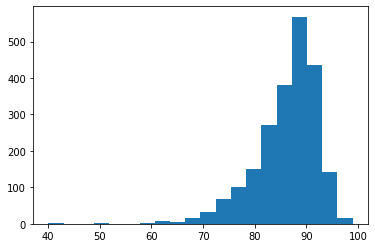

In [642]:
plt.hist(df['core_score'], bins=20)

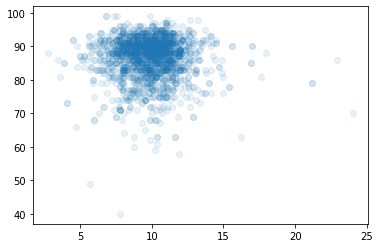

In [401]:
plt.scatter( df['weight_men'],df['core_score'], alpha=.1)

Text(0.5, 0, 'Expert Score')

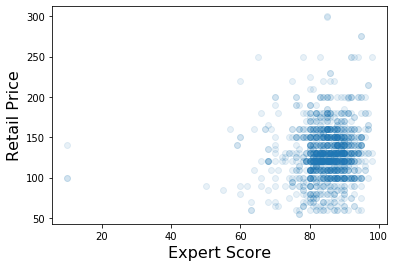

In [650]:
plt.scatter(df['expert_score'],df['retail_price'],  alpha=.1)
plt.ylabel('Retail Price', fontsize = 16)
plt.xlabel('Expert Score', fontsize = 16)
#plt.title('Does a more expensive shoe lead to a better rating?', fontsize=18)


Text(0.5, 0, 'Core Score')

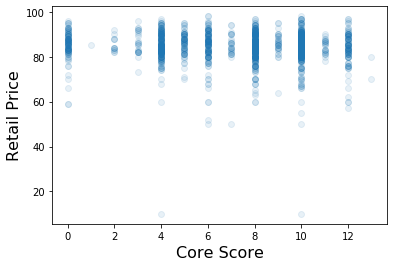

In [661]:
plt.scatter(df['heel_to_toe_men'],df['expert_score'],  alpha=.1)
plt.ylabel('Retail Price', fontsize = 16)
plt.xlabel('Core Score', fontsize = 16)
#plt.title('Does a more expensive shoe lead to a better rating?', fontsize=18)


In [672]:
brand_count = df.groupby('brand').agg(['count'])['product']
brand_count = pd.merge(df, brand_count, how='left', on ='brand')
brand_count = brand_count[brand_count['count'] >= 40]
#mid_price = df[(df['retail_price'] >100) & (df['retail_price']< 160)]

In [659]:
df['reviews']

TypeError: corr() missing 1 required positional argument: 'other'

In [554]:
group.agg(['mean','max', 'min', 'count'])['expert_score']

,mean,max,min,count
brand,,,,
361 Degrees,87.750000,92.0,82.0,8
Adidas,84.312500,97.0,66.0,128
Altra,86.816327,96.0,76.0,49
Arc'teryx,89.500000,90.0,89.0,2
Asics,84.291045,98.0,64.0,134
Brooks,85.755556,97.0,65.0,90
Columbia,91.000000,91.0,91.0,1
Dynafit,80.800000,85.0,76.0,5
Hoka One One,86.285714,97.0,75.0,63


Text(0.5, 1.0, 'How does your running shoe brand stack up?')

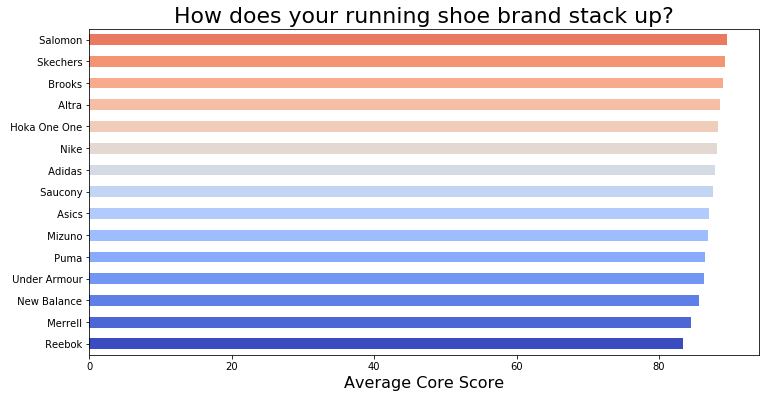

In [695]:
plt.figure(figsize=(12,6))
start = 0.0
stop = 1.0
number_of_lines= 1000
cm_subsection = np.linspace(start, stop, number_of_lines)
brand_count.groupby(['brand'])['core_score'].mean().sort_values(ascending=True).plot.barh(color = [ cm.coolwarm(x) for x in np.linspace(start, stop, 18) ])
plt.ylabel('',)
plt.xlabel('Average Core Score', fontsize = 16)
plt.title('How does your running shoe brand stack up?', fontsize=22)


Text(0.5, 1.0, 'How does your running shoe brand stack up according to the experts?')

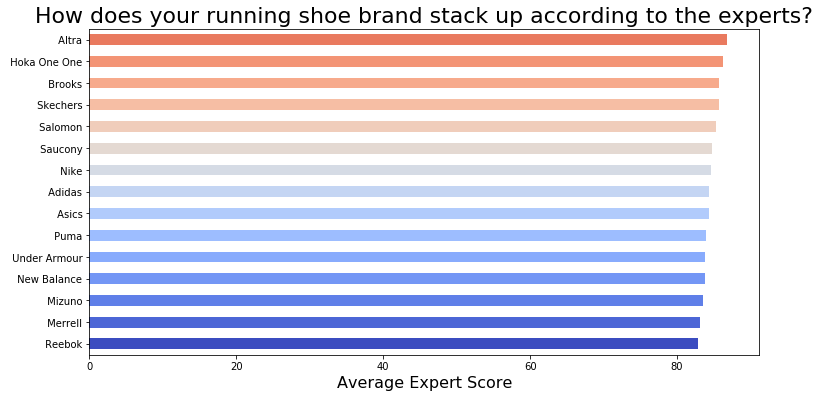

In [693]:
plt.figure(figsize=(12,6))
start = 0.0
stop = 1.0
number_of_lines= 1000
cm_subsection = np.linspace(start, stop, number_of_lines)
brand_count.groupby(['brand'])['expert_score'].mean().sort_values(ascending=True).plot.barh(color = [ cm.coolwarm(x) for x in np.linspace(start, stop, 18) ])
plt.ylabel('')
plt.xlabel('Average Expert Score', fontsize = 16)
plt.title('How does your running shoe brand stack up according to the experts?', fontsize=22)


Text(0.5, 1.0, 'Do consumers prefer a type of Arch Support?')

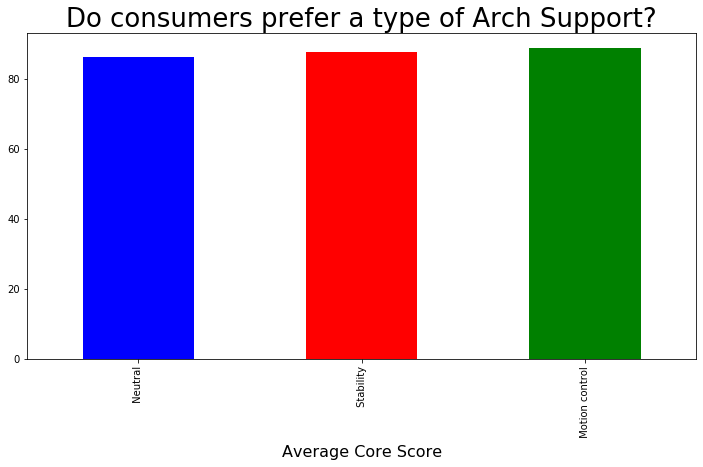

In [676]:
plt.figure(figsize=(12,6))
df.groupby(['arch_support'])['core_score'].mean().sort_values().plot.bar(color=['b','r', 'g'])
plt.ylabel('')
plt.xlabel('Average Core Score', fontsize = 16)
plt.title('Do consumers prefer a type of Arch Support?', fontsize=26)


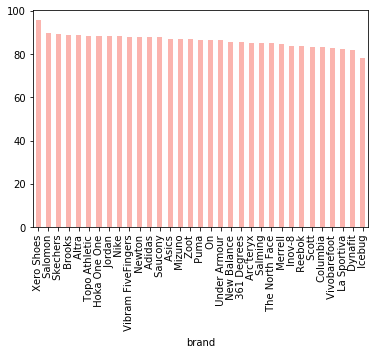

In [593]:
df.groupby('brand')['core_score'].mean().sort_values(ascending=False).plot.bar(cmap='Pastel1')

In [575]:
brand_count['brand'].value_counts()

 Asics            247
 Nike             212
 Adidas           200
 New Balance      172
 Reebok           120
 Saucony          113
 Brooks           109
 Under Armour     107
 Salomon          107
 Puma              85
 Mizuno            78
 Hoka One One      73
 Merrell           65
 Altra             51
 Skechers          43
 Inov-8            40
 Newton            28
 On                24
 La Sportiva       23
 Topo Athletic     21
Name: brand, dtype: int64

In [8]:
core_score_high = df[df['core_score'] >= 90]

In [10]:
core_score_high.corr()

,core_score,expert_score,reviews,retail_price,sale_price,weight_men,weight_women,heel_to_toe_men,heel_to_toe_women
core_score,1.000000,0.204814,0.076346,0.097209,0.055514,0.017940,0.037512,0.059494,0.061822
expert_score,0.204814,1.000000,-0.032196,0.082922,0.071238,-0.048145,-0.048354,-0.067390,-0.066276
reviews,0.076346,-0.032196,1.000000,-0.051655,0.003636,0.046192,0.021112,0.109376,0.113756
retail_price,0.097209,0.082922,-0.051655,1.000000,0.658352,0.257226,0.295973,-0.025466,-0.002803
sale_price,0.055514,0.071238,0.003636,0.658352,1.000000,0.185778,0.172271,-0.140901,-0.103470
weight_men,0.017940,-0.048145,0.046192,0.257226,0.185778,1.000000,0.918085,0.437582,0.442682
weight_women,0.037512,-0.048354,0.021112,0.295973,0.172271,0.918085,1.000000,0.414955,0.414725
heel_to_toe_men,0.059494,-0.067390,0.109376,-0.025466,-0.140901,0.437582,0.414955,1.000000,0.989178
heel_to_toe_women,0.061822,-0.066276,0.113756,-0.002803,-0.103470,0.442682,0.414725,0.989178,1.000000


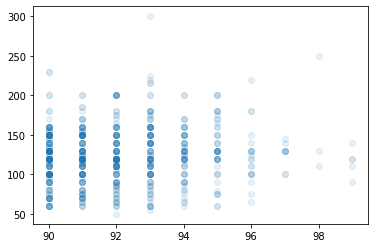

In [12]:
plt.scatter( core_score_high['core_score'],core_score_high['retail_price'], alpha=.1)

Text(0.5, 1.0, 'Do consumers prefer a type of Arch Support?')

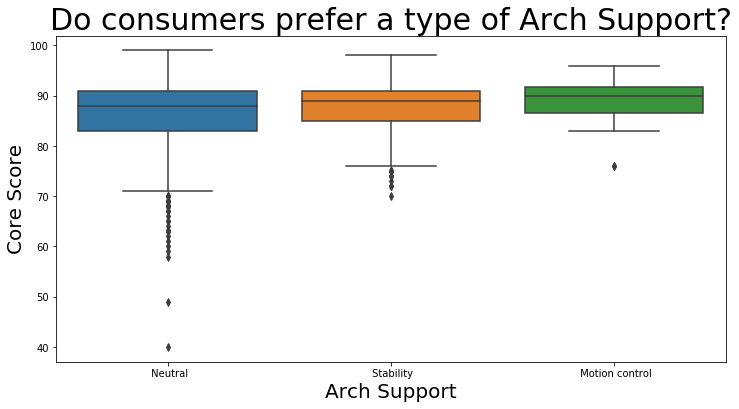

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(x='arch_support', y='core_score', data=df)
plt.xlabel("Arch Support", fontsize=20)
plt.ylabel("Core Score", fontsize=20)
plt.title("Do consumers prefer a type of Arch Support?", fontsize = 30)

In [36]:
test = df[df['arch_support'] == ' Motion control']

In [39]:
test

,product,brand,core_score,expert_score,reviews,retail_price,sale_price,terrain,arch_support,weight_men,weight_women,heel_to_toe_men,heel_to_toe_women,release_date,width,update,url,summary
58,Brooks Adrenaline GTS 20,Brooks,95.0,90.0,138.0,130.0,NaN,Road,Motion control,10.7,9.4,12.0,12.0,2019-11-01,"Narrow, Normal, Wide, X-Wide | Narrow, Normal...",NaN,https://runrepeat.com/brooks-adrenaline-gts-20,9 reasons to buy\nMany consumers said that the...
82,Brooks Addiction 13,Brooks,86.0,88.0,1525.0,130.0,85.0,Road,Motion control,13.3,12.2,12.0,12.0,NaT,"Narrow, Normal, Wide, X-Wide | Narrow, Normal...",Brooks Addiction 14,https://runrepeat.com/brooks-addiction-13,6 reasons to buy\nSeveral testers stated that ...
88,New Balance Rubix,New Balance,95.0,90.0,57.0,165.0,93.0,Road,Motion control,10.7,8.9,8.0,8.0,2018-11-01,"Normal, Wide | Normal, Wide",NaN,https://runrepeat.com/new-balance-rubix,5 reasons to buy\nMany buyers agreed that the ...
146,Hoka One One Gaviota 2,Hoka One One,88.0,87.0,117.0,150.0,NaN,Road,Motion control,10.6,8.8,5.0,5.0,2018-12-01,"Normal, Wide | Normal, Wide",NaN,https://runrepeat.com/hoka-one-one-gaviota-2,5 reasons to buy\nOne runner mentioned that he...
161,Brooks Adrenaline GTS 19,Brooks,96.0,89.0,1856.0,130.0,90.0,Road,Motion control,11.0,9.6,12.0,12.0,2018-11-01,"Narrow, Normal, Wide, X-Wide | Narrow, Normal...",Brooks Adrenaline GTS 20,https://runrepeat.com/brooks-adrenaline-gts-19,7 reasons to buy\nMany people claimed that the...
330,Brooks Beast 18,Brooks,89.0,86.0,1015.0,160.0,NaN,Road,Motion control,NaN,NaN,NaN,NaN,2018-05-01,"Normal, Wide, X-Wide | Normal",Brooks Beast '20,https://runrepeat.com/brooks-beast-18,8 reasons to buy\nMany people felt that the si...
564,Brooks Addiction 12,Brooks,90.0,81.0,2299.0,120.0,NaN,Road,Motion control,13.5,11.9,12.0,12.0,2015-08-01,"Normal, Wide, X-Wide | Narrow, Normal",Brooks Addiction 14,https://runrepeat.com/brooks-addiction,5 reasons to buy\nIt features the Brooks DNA t...
601,Brooks Beast 14,Brooks,92.0,87.0,599.0,150.0,NaN,Road,Motion control,13.8,12.2,12.0,12.0,2014-09-01,Normal | Normal,Brooks Beast '20,https://runrepeat.com/brooks-beast,7 reasons to buy\nThe Element Mesh and Element...
612,New Balance 1540 v2,New Balance,84.0,67.0,3775.0,160.0,144.0,Road,Motion control,14.7,11.4,10.0,10.0,NaT,"Narrow, Normal, Wide, X-Wide | Narrow, Normal...",New Balance 1540 v3,https://runrepeat.com/new-balance-1540,5 reasons to buy\nMany runners took note that ...
726,Hoka One One Gaviota,Hoka One One,91.0,88.0,279.0,150.0,110.0,Road,Motion control,10.5,8.6,5.0,5.0,2017-01-01,Normal | Normal,Hoka One One Gaviota 2,https://runrepeat.com/hoka-one-one-gaviota,10 reasons to buy\nMany runners have considere...
